In [1]:
import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical


def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("data/fashion/train-labels-idx1-ubyte.gz")

#Y daten werden auf 1 oder null gesetz 
#y_train = y_train == 0 

X_test = open_images("data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("data/fashion/t10k-labels-idx1-ubyte.gz")


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [21]:
model = Sequential()

#kernal_size beschreibt wie hoch oder breit der filter ist
model.add(Conv2D(25, kernel_size=(3, 3),activation="relu", input_shape=(28, 28, 1)))

#macht alle ausgangs ebenden zu einer sonst 10 ebenden aus Conv2D
model.add(Flatten())

#10 = bestimmung der ausgänge
model.add(Dense(10, activation="softmax"))

#loss = binary_crossentrop 1 / 0 & categorical_crossentropy mehree ausgänge (katoegorien vorhersagen)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train.reshape(60000, 28, 28, 1), 
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60/60 [==============================] - 5s 77ms/step - loss: 15.6933 - accuracy: 0.7003
Epoch 2/10
60/60 [==============================] - 4s 75ms/step - loss: 0.8934 - accuracy: 0.8400
Epoch 3/10
60/60 [==============================] - 4s 74ms/step - loss: 0.3762 - accuracy: 0.8766
Epoch 4/10
60/60 [==============================] - 5s 77ms/step - loss: 0.2710 - accuracy: 0.9025
Epoch 5/10
60/60 [==============================] - 5s 78ms/step - loss: 0.2158 - accuracy: 0.9212
Epoch 6/10
60/60 [==============================] - 4s 72ms/step - loss: 0.1853 - accuracy: 0.9314
Epoch 7/10
60/60 [==============================] - 4s 71ms/step - loss: 0.1631 - accuracy: 0.9397
Epoch 8/10
60/60 [==============================] - 4s 70ms/step - loss: 0.1461 - accuracy: 0.9470
Epoch 9/10
60/60 [==============================] - 4s 70ms/step - loss: 0.1297 - accuracy: 0.9520
Epoch 10/10
60/60 [==============================] - 4s 69ms/step - loss: 0.1187 - accuracy: 0.9557


In [7]:
model.layers[0].weights[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 25) dtype=float32, numpy=
array([[[[ 0.03096189,  0.05432285,  0.03260697, -0.24757646,
          -0.14641069, -0.07312331,  0.00477066, -0.37131944,
          -0.16360958,  0.07329287, -0.04167334, -0.0584667 ,
          -0.05832481, -0.1604969 , -0.08559445, -0.0059605 ,
          -0.14709274,  0.12106948,  0.11811028, -0.14204842,
          -0.18256095,  0.08617292,  0.03613443, -0.00144834,
          -0.14894913]],

        [[ 0.10910159,  0.04175174, -0.09122717, -0.37241113,
           0.20908149, -0.20894648, -0.084966  ,  0.07207508,
           0.05646465, -0.13281748, -0.5466703 ,  0.11696968,
           0.05363927, -0.00334702, -0.22657499, -0.07179595,
           0.22223566, -0.25151163, -0.08806781,  0.11725967,
           0.12454311,  0.04649547, -0.07659723,  0.14304319,
          -0.00860855]],

        [[-0.142398  , -0.07661062, -0.10317606,  0.08173028,
          -0.06593832,  0.05256721,  0.08348972, -0.03864942,
       

In [8]:
#gewichte ausgeben 
import keras.backend as K

In [10]:
data = K.eval(model.layers[0].weights[0])
print(data)

[[[[ 0.03096189  0.05432285  0.03260697 -0.24757646 -0.14641069
    -0.07312331  0.00477066 -0.37131944 -0.16360958  0.07329287
    -0.04167334 -0.0584667  -0.05832481 -0.1604969  -0.08559445
    -0.0059605  -0.14709274  0.12106948  0.11811028 -0.14204842
    -0.18256095  0.08617292  0.03613443 -0.00144834 -0.14894913]]

  [[ 0.10910159  0.04175174 -0.09122717 -0.37241113  0.20908149
    -0.20894648 -0.084966    0.07207508  0.05646465 -0.13281748
    -0.5466703   0.11696968  0.05363927 -0.00334702 -0.22657499
    -0.07179595  0.22223566 -0.25151163 -0.08806781  0.11725967
     0.12454311  0.04649547 -0.07659723  0.14304319 -0.00860855]]

  [[-0.142398   -0.07661062 -0.10317606  0.08173028 -0.06593832
     0.05256721  0.08348972 -0.03864942 -0.14213249  0.06114715
    -0.45087147 -0.12991898 -0.17877312 -0.13171886  0.09435738
     0.08366153 -0.14177522 -0.1209301  -0.13744716  0.02855093
    -0.09562748 -0.10143127  0.09594622 -0.14434697  0.10114063]]]


 [[[-0.14456354 -0.12650238 -

In [13]:
data[:, :, :, 0].reshape(3, 3)

array([[ 0.03096189,  0.10910159, -0.142398  ],
       [-0.14456354, -0.05857227,  0.1473765 ],
       [ 0.04874306, -0.15785953, -0.02117338]], dtype=float32)

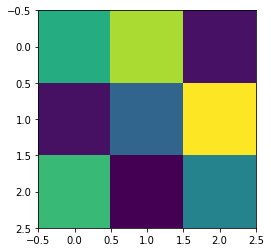

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data[:,:,:,0].reshape(3,3))
plt.show()

In [22]:
#neues model
model2 = Sequential()


#gewichte manuell inizialisieren
model2.add(Conv2D(25, 
                  kernel_size=(3, 3),
                  activation="relu", 
                  input_shape=(28, 28, 1), 
                  weights=model.layers[0].get_weights()))

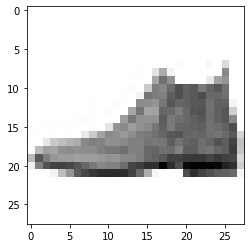

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_test[0], cmap="gray_r")

In [44]:
res =model2.predict(X_train[0].reshape(1, 28, 28, 1))

In [45]:
res.shape

(1, 26, 26, 25)

In [46]:
res[0].shape

(26, 26, 25)

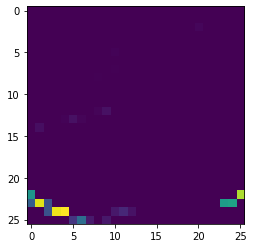

In [48]:
plt.imshow(res[0][:, :, 0])
plt.show()